# Assignment 12: EWMA Chart
Sydney Perrin

April 7th, 2022

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

## Import Data

In [2]:
df = pd.read_csv('12 data.csv')
#df.head(100)

## # 1. Twenty individual observations on molecular weight taken hourly from a chemical process are presented in the dataset. Set up MR and I charts. Is the process in control?
ANS: See MR and I charts in the code below. Yes, the process is in control because there are no points out of bounds in the control charts.

### Check for Normaility

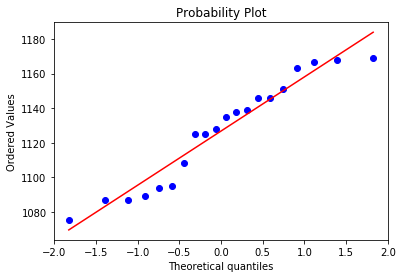

(0.9256460070610046, 0.12729257345199585)
NormaltestResult(statistic=3.7094719038048782, pvalue=0.15649425923136487)


In [3]:
x=df['Weight']

# Graphic test
stat.probplot(x, plot=plt)
plt.show() 

# Stats tests
t1=stat.shapiro(x)
t2=stat.normaltest(x)
print(t1)
print(t2)

# Normally distributed because p>0.05. Do not need to normalize by taking log(x).

### Moving Range (MR) Calculations

In [4]:
m=20 # Number of samples
n=1 # Sample size

MR = (m-1)*[None]
for i in range(m-1):
    MR[i]=np.abs(x[i+1]-x[i])

# MR control chart constants for n=2
A2=1.880
d2=1.128
D4=3.267
D3=0

MRbar=np.mean(MR)
CL_MR = MRbar
UCL_MR = D4*MRbar
LCL_MR = D3*MRbar #0

print('CL_MR=', CL_MR)
print('UCL_MR=', UCL_MR)
print('LCL_MR=', LCL_MR)

CL_MR= 20.842105263157894
UCL_MR= 68.09115789473684
LCL_MR= 0.0


### Plot MR Chart

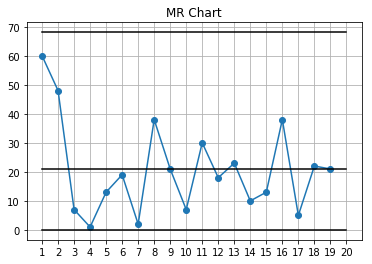

In [5]:
m=20
x=df['Weight']

ucl_line = np.full(m,UCL_MR) 
lcl_line = np.full(m,LCL_MR) 
cl_line = np.full(m,CL_MR) 
plt.plot(MR,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('MR Chart')
plt.show()

# No points out of bounds.

### Individuals (I) Calculations

In [6]:
# Individuals control chart contant for n=2
E2=2.660

x=df['Weight']
xbar=np.mean(x)
CL_x=xbar
UCL_x=xbar+E2*MRbar
LCL_x=xbar-E2*MRbar

print('CL_x=', CL_x)
print('UCL_x=', UCL_x)
print('LCL_x=', LCL_x)

CL_x= 1126.75
UCL_x= 1182.19
LCL_x= 1071.31


### Plot I Chart

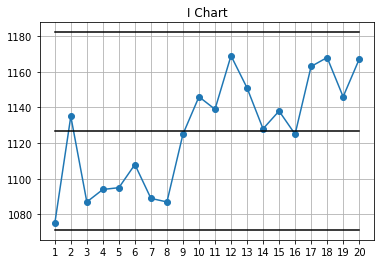

In [7]:
m=20
x=df['Weight']

ucl_line = np.full(m,UCL_x)
lcl_line = np.full(m,LCL_x) 
cl_line = np.full(m,CL_x) 
plt.plot(x,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('I Chart')
plt.show()

# No points out of bounds.

## 2. Based on the data and the control charts, what is the estimate of the process mean?
ANS: The estimate of the process mean is mu=1126.75

In [8]:
mu = CL_x
print('mu=', mu) 

mu= 1126.75


## 3. Based on the data and the control charts, what is the estimate of the process standard deviation?
ANS: The estimate of the process standard deviation is sigma=18.48

In [9]:
sigma = MRbar/d2
print('sigma=', sigma)

sigma= 18.477043673012318


## 4. We wish to detect all the shifts of 1.0 𝜎 that may happen in this process with an EWMA control chart. What are the appropriate values of 𝜆 and L that will result in the lowest ARL?
ANS: The appropriate values are lamda=0.10 and L=2.814 

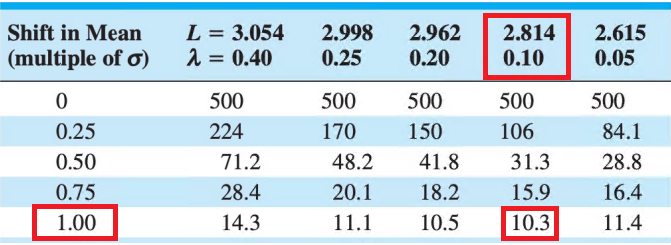

In [10]:
# Using Table 9.11 ARL Chart
L = 2.814
lam = 0.1
print('L=', L)
print('lamda=', lam)

L= 2.814
lamda= 0.1


## 5. Set up an EWMA control chart for the shifts of 1.0 𝜎 using the values of 𝜆 and L selected in the previous question. Assume that µ0 and 𝜎 are the values of mean and standard deviation found in the I-MR chart. Is the process in control now?
ANS: See EWMA chart in the code below. No, the process is not in control now because there are points out of bounds.

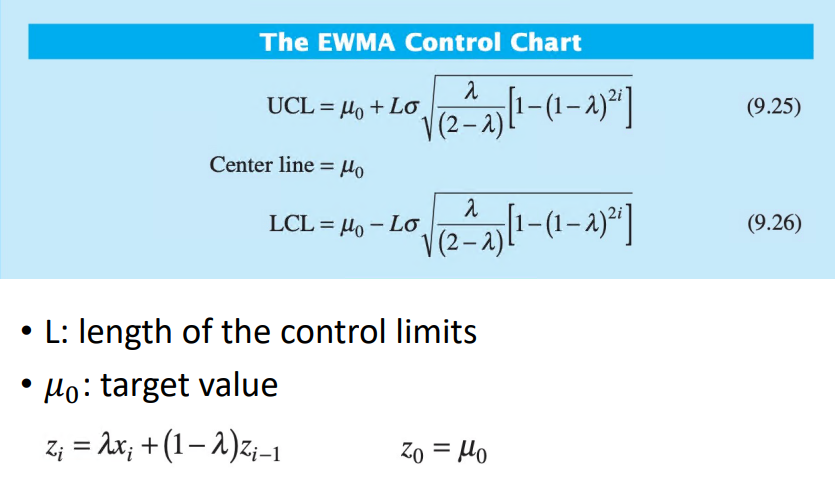

### EWMA Calculations

In [11]:
L = 2.814 # From Q4
lam = 0.1 # From Q4

x=df['Weight']

z = m*[None] # Initialize an array
z[0] = mu # Initialize first value

UCL=m*[None] # Initialize an array
LCL=m*[None] # Initialize an array

for i in range(1,m-1):
    z[i]=lam*x[i-1]+(1-lam)*z[i-1]
    term1=(lam/(2-lam))*(1-(1-lam)**(2*(i)))
    term2=L*sigma*np.sqrt(term1)
    UCL[i]=mu+term2
    LCL[i]=mu-term2 

### Plot EWMA Chart

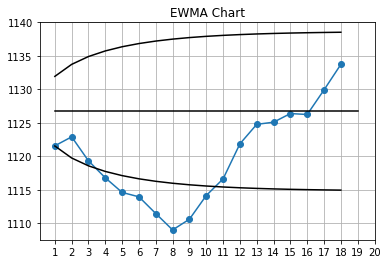

In [12]:
ucl_line = np.full(m,UCL) 
lcl_line = np.full(m,LCL) 
cl_line = np.full(m,mu) 
plt.plot(z[1:],marker="o")
plt.plot(ucl_line[1:],color='k')
plt.plot(lcl_line[1:],color='k')
plt.plot(cl_line[1:],color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('EWMA Chart')
plt.show()

## 6. When was the shift of 1.0 𝜎 firstly detected in the EWMA chart?
ANS: The shift was firstly detected in the EWMA chart around sample 3 or 4 because this is when it becomes out of bounds in the control chart.

## 7. Now we wish to detect a shift of 2.5 𝜎 in the process using the EWMA chart. What are the values of 𝜆 and L that will result in the lowest ARL?
ANS: The appropriate values are lamda = 0.40 and L=3.054

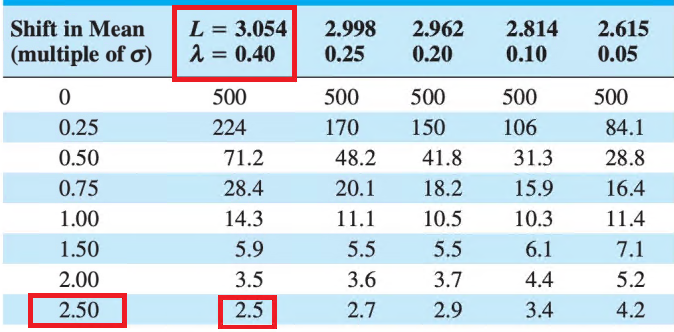

In [13]:
# Using Table 9.11 ARL Chart
L=3.054
lam=0.40
print('L=', L)
print('lamda=', lam)

L= 3.054
lamda= 0.4


## 8. Set up an EWMA control chart for the shifts of 2.5 𝜎 using the values of 𝜆 and L selected in the previous question. Assume that µ0 and 𝜎 are the values of mean and standard deviation found in the I-MR chart. Is the process in control now?
ANS: See EWMA chart in the code below. No, the process is not in control now because there are points out of bounds.

### EWMA Calculations

In [14]:
L=3.054 # from Q7
lam=0.40 # from Q7

x=df['Weight']

z = m*[None] # Initialize an array
z[0] = mu # Initialize first value

UCL=m*[None] # Initialize an array
LCL=m*[None] # Initialize an array

for i in range(1,m-1):
    z[i]=lam*x[i-1]+(1-lam)*z[i-1]
    term1=(lam/(2-lam))*(1-(1-lam)**(2*(i)))
    term2=L*sigma*np.sqrt(term1)
    UCL[i]=mu+term2
    LCL[i]=mu-term2 

### Plot EWMA Chart

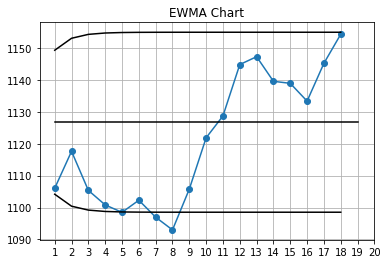

In [15]:
ucl_line = np.full(m,UCL) 
lcl_line = np.full(m,LCL) 
cl_line = np.full(m,mu) 
plt.plot(z[1:],marker="o")
plt.plot(ucl_line[1:],color='k')
plt.plot(lcl_line[1:],color='k')
plt.plot(cl_line[1:],color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('EWMA Chart')
plt.show()

## 9. When was the shift of 2.5 𝜎 firstly detected in the EWMA chart?
ANS: The shift was firstly detected in the EWMA chart around sample 5 because this is when it becomes out of bounds in the control chart.

## 10. Now suppose we wish to implement a Fast Initial Response (FIR) to the EWMA control chart for the shift of 1.0 𝜎. When is this shift firstly detected in the EWMA chart? Assume f = 0.5.
ANS: The shift was firstly detected in the EWMA chart around sample 2 because this is when it becomes out of bounds in the control chart.

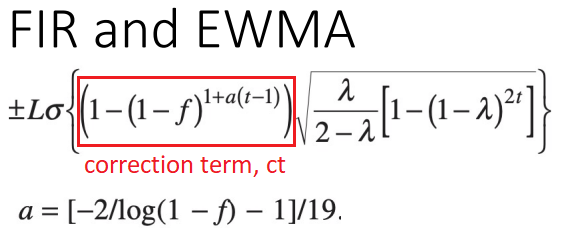

### FIR EWMA Calculations

In [16]:
f=0.5

L = 2.814 # From Q4
lam = 0.1 # From Q4

x=df['Weight']

z = m*[None] # Initialize an array
z[0] = mu # Initialize first value

UCL=m*[None] # Initialize an array
LCL=m*[None] # Initialize an array
 
ct = m*[None] # let ct represent the correction term

a=((-2/np.log(1-f)))/(m-1)

for i in range(1,m-1):
    z[i]=lam*x[i-1]+(1-lam)*z[i-1]
    term1=(lam/(2-lam))*(1-(1-lam)**(2*(i)))
    ct[i] = 1-(1-f)**(1+a*(i-1))
    term2=L*sigma*np.sqrt(term1)*ct[i]
    UCL[i]=mu+term2
    LCL[i]=mu-term2 

### Plot FIR EWMA Chart

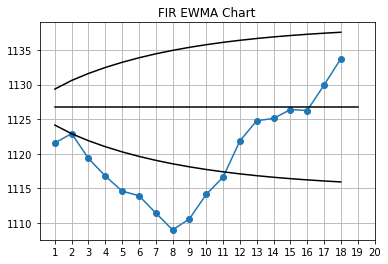

In [17]:
ucl_line = np.full(m,UCL)
lcl_line = np.full(m,LCL)
cl_line = np.full(m,mu)
plt.plot(z[1:],marker="o")
plt.plot(ucl_line[1:],color='k')
plt.plot(lcl_line[1:],color='k')
plt.plot(cl_line[1:],color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('FIR EWMA Chart')
plt.show()

# This control chart narrows the band.